# Practicing the Preprocessing techniques and the Train/Test split of the Data 

#Handling missing Value

#Using a SimpleImputer 



In [17]:
#Creating dataset 
import pandas as pd
import numpy as np 
import sklearn
import warnings
warnings.filterwarnings('ignore',category=UserWarning)

data= {'One':pd.Series([1,2,5],index=['a','b','e']),
        'Two':pd.Series([1,2,3,4],index=['a','b','c','d'])}

table=pd.DataFrame(data)
table
print('Table Before:\n',table)



Table Before:
    One  Two
a  1.0  1.0
b  2.0  2.0
c  NaN  3.0
d  NaN  4.0
e  5.0  NaN


In [21]:
# Now Applying the SimpleImputer method to fill out the missing values 
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(table) #applying the imputer stategy on the table
imputed_data=imputer.transform(table.values)
table2=pd.DataFrame(imputed_data,columns=['One','Two'])
print('After Simpleimputer:\n',table2)

After Simpleimputer:
         One  Two
0  1.000000  1.0
1  2.000000  2.0
2  2.666667  3.0
3  2.666667  4.0
4  5.000000  2.5


#Handling categorical values

#1. get_dummies

In [34]:
import pandas as pd
data = {'Customer_id': pd.Series([1,2,3,4,5]),
        'Loan_type': pd.Series(['Home Loan',
                                'Personal Loan',
                                'Education Loan',
                                'Home Loan',
                                'Credit Loan']),
        'Income': pd.Series(['30K','25K',
                        '15K','40K','35K'])}
loan_info = pd.DataFrame(data)
print(loan_info)


   Customer_id       Loan_type Income
0            1       Home Loan    30K
1            2   Personal Loan    25K
2            3  Education Loan    15K
3            4       Home Loan    40K
4            5     Credit Loan    35K


In [35]:
pd.get_dummies(loan_info,prefix_sep='_',drop_first=False)

,Customer_id,Loan_type_Credit Loan,Loan_type_Education Loan,Loan_type_Home Loan,Loan_type_Personal Loan,Income_15K,Income_25K,Income_30K,Income_35K,Income_40K
0,1,False,False,True,False,False,False,True,False,False
1,2,False,False,False,True,False,True,False,False,False
2,3,False,True,False,False,True,False,False,False,False
3,4,False,False,True,False,False,False,False,False,True
4,5,True,False,False,False,False,False,False,True,False


#Handling categorical values

#2.Using LabelEncoder

In [32]:
import pandas as pd
data = {'Customer_id': pd.Series([1,2,3,4,5]),
        'Loan_type': pd.Series(['Home Loan',
                                'Personal Loan',
                                'Education Loan',
                                'Home Loan',
                                'Credit Loan']),
        'Income': pd.Series(['30K','25K',
                        '15K','40K','35K'])}
loan_info = pd.DataFrame(data)
print(loan_info)


   Customer_id       Loan_type Income
0            1       Home Loan    30K
1            2   Personal Loan    25K
2            3  Education Loan    15K
3            4       Home Loan    40K
4            5     Credit Loan    35K


In [33]:
# Above data have lots of categorical values 
Labelencoder=LabelEncoder()
df_up=loan_info.apply(Labelencoder.fit_transform)
df_u=pd.DataFrame(df_up)
df_u

,Customer_id,Loan_type,Income
0,0,2,2
1,1,3,1
2,2,1,0
3,3,2,4
4,4,0,3


#Handling categorical variable 

#Using onehotencoding 


In [6]:
import pandas as pd
data = {'Customer_id': pd.Series([1,2,3,4,5]),
        'Loan_type': pd.Series(['Home Loan',
                                'Personal Loan',
                                'Education Loan',
                                'Home Loan',
                                'Credit Loan']),
        'Income': pd.Series(['30K','25K','15K',
                             '40K','35K'])}
loan_info = pd.DataFrame(data)

from sklearn.preprocessing import OneHotEncoder
Onehotencoder=OneHotEncoder()
x=Onehotencoder.fit_transform(loan_info).toarray()
print(x)

[[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.]]


#Scaling the data 

1. Standard scalar 

2. MinMaxScalar 

3. Robust scalar

<Axes: >

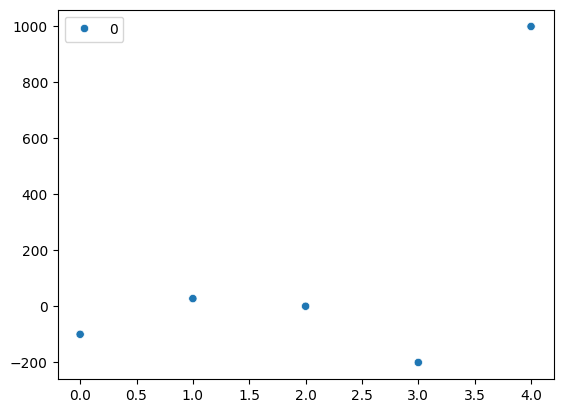

In [10]:
# 1. Standard scalar 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
data1 = np.array([[-100.3],
                  [27.5], 
                  [0],
                  [-200.9],
                  [1000]])
sns.scatterplot(data1)

"""So in the below graph the data points are distributed in very wide range, if i can limit then in the correct range the 
    distribution will be fine and we will be able to draw some insights."""

# Hence need to scale the data 

In [12]:
"""This means that after applying StandardScaler, a feature will have a mean of 0 and a standard deviation of 1. """

from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
data_scaled = standard.fit_transform(data1)
data_scaled

"""The range of the data after standardization will depend on the distribution of the data itself; 
because standardization does not bound the data to a specific range, the resulting transformed data can have any range."""

array([[-0.5646401 ],
       [-0.27077707],
       [-0.33401051],
       [-0.79595951],
       [ 1.96538718]])

<Axes: >

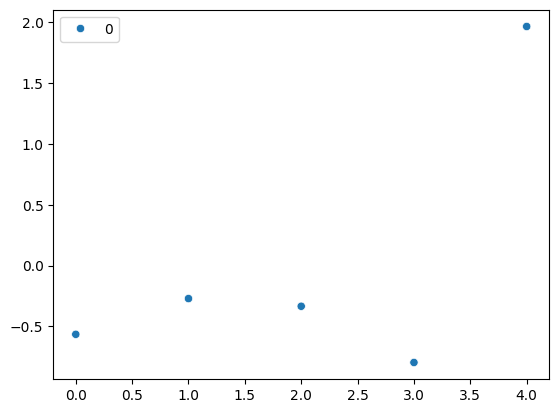

In [13]:
# Now lets check the distribution 
sns.scatterplot(data_scaled)  

# Featurs will be at the same scale but the ratio will change 

In [15]:
#2. MinMax scalar 
import numpy as np
from sklearn import preprocessing

data1 = np.array([[-100.3],
                  [27.5], 
                  [0],
                  [-200.9],
                  [1000]])
print('Before scaling\n',data1)

# Minmax scalar scale the data in the perticular range 'given'
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler(feature_range=(1,2))

data_scaled= minmax.fit_transform(data1)
print('After scaling:\n',data_scaled)

Before scaling
 [[-100.3]
 [  27.5]
 [   0. ]
 [-200.9]
 [1000. ]]
After scaling:
 [[1.08377051]
 [1.19019069]
 [1.1672912 ]
 [1.        ]
 [2.        ]]


In [19]:
#3. Robust scalling 
# It uses the IQr for scaling the each data point 

import numpy as np
from sklearn import preprocessing

data1 = np.array([[-100.3],
                  [27.5], 
                  [0],
                  [-200.9],
                  [1000]])
print('Before Scaling\n',data1)

from sklearn.preprocessing import RobustScaler

Robust= RobustScaler()
data_scaled = Robust.fit_transform(data1)
print('After scale:\n',data_scaled)

Before Scaling
 [[-100.3]
 [  27.5]
 [   0. ]
 [-200.9]
 [1000. ]]
After scale:
 [[-0.78482003]
 [ 0.21517997]
 [ 0.        ]
 [-1.57198748]
 [ 7.82472613]]


#Normalization

In [28]:
import numpy as np
from sklearn import preprocessing

data = np.array(
    [[5.1,3.5,1.4,0.2],
     [4.9,3.0,1.4,0.2],
     [4.7,3.2,1.3,0.2],
     [4.6,3.1,1.5,0.2],
     [5.0,3.6,1.4,0.2]])
print('Before Normalization\n',data)

from sklearn.preprocessing import normalize

data_nor=normalize(data)
print('\nAfter normalization:\n',data_nor)

Before Normalization
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

After normalization:
 [[0.80377277 0.55160877 0.22064351 0.0315205 ]
 [0.82813287 0.50702013 0.23660939 0.03380134]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.80003025 0.53915082 0.26087943 0.03478392]
 [0.790965   0.5694948  0.2214702  0.0316386 ]]


<Axes: >

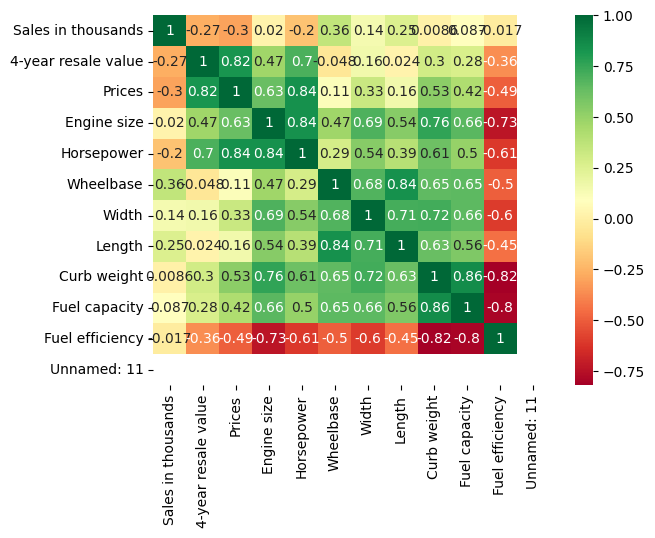

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
df= pd.read_csv('Car_sales.csv')
df.head()
# If we want we can drop the unwanted columns such columns containing the srting values 
# Get the correlation of the each feature 
corr_mat = df.corr()
top_corr_features = corr_mat.index

sns.heatmap(df[top_corr_features].corr(), annot=True,cmap="RdYlGn")

In [18]:
df.corr()

,Sales in thousands,4-year resale value,Prices,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Unnamed: 11
Sales in thousands,1.000000,-0.266436,-0.304734,0.019983,-0.197756,0.358179,0.140918,0.254980,0.008628,0.086540,-0.016764,NaN
4-year resale value,-0.266436,1.000000,0.822452,0.468813,0.696888,-0.047806,0.159591,0.023869,0.297929,0.275045,-0.358546,NaN
Prices,-0.304734,0.822452,1.000000,0.626875,0.839744,0.110513,0.329136,0.156935,0.526224,0.423282,-0.492157,NaN
Engine size,0.019983,0.468813,0.626875,1.000000,0.837360,0.472130,0.690398,0.541424,0.760043,0.663022,-0.734622,NaN
Horsepower,-0.197756,0.696888,0.839744,0.837360,1.000000,0.286308,0.539158,0.393364,0.610131,0.499907,-0.611332,NaN
Wheelbase,0.358179,-0.047806,0.110513,0.472130,0.286308,1.000000,0.683135,0.839639,0.651016,0.654044,-0.497931,NaN
Width,0.140918,0.159591,0.329136,0.690398,0.539158,0.683135,1.000000,0.710435,0.720927,0.656302,-0.602546,NaN
Length,0.254980,0.023869,0.156935,0.541424,0.393364,0.839639,0.710435,1.000000,0.627163,0.563540,-0.446756,NaN
Curb weight,0.008628,0.297929,0.526224,0.760043,0.610131,0.651016,0.720927,0.627163,1.000000,0.863968,-0.818402,NaN
Fuel capacity,0.086540,0.275045,0.423282,0.663022,0.499907,0.654044,0.656302,0.563540,0.863968,1.000000,-0.801512,NaN
